# [IAPR 2018:][iapr2018] Lab 1 ‒  Image segmentation

**Author:** first name and last name  
**Due date:** 20.04.2018

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os
import numpy as np
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

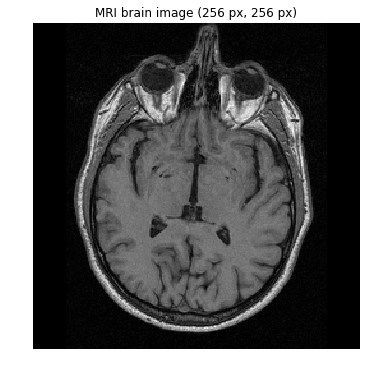

In [197]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing
Add your implementation and discussion


In [35]:
pixel = [[i,j] for i in range(im_h) for j in range(im_w)]

In [36]:
## need to be improve or find a proper threshold T

In [37]:
def grow(x_start,y_start,image,size,threshold,pixels):
    pixel = []
    image = image
    pixel_new = [[x_start+i,y_start+j] for i in range(-size,size+1) for j in range(-size,size+1) if x_start+i in range(256) and y_start+j in range(256) ]
    for t in pixel_new:
        x,y = t
        if np.abs(10*int(image[x,y])-10*int(image[x_start,y_start])) < threshold and t not in pixels :
            if t not in pixel:
                pixel.append(t)
    return pixel

In [38]:
brain_im1 = brain_im
pixel_same = [[128,128]]
size = 1
pixels = []
while(len(pixel_same) > 0):
    pixel_iter = []
    for i in pixel_same:
        x_start,y_start = i
        a = grow(x_start,y_start,brain_im1,size,72,pixels)
        pixels = pixels+a
        if [i[0],i[1]] in a:
            a.remove([i[0],i[1]])
        pixel_iter += a
    pixel_same = pixel_iter

In [39]:
len(pixels)

52894

In [40]:
for ele in pixels:
    pixel.remove(ele)
for i in pixel:
    brain_im1[i[0],i[1]] = 0

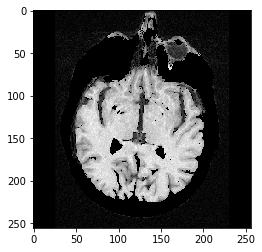

In [41]:
plt.imshow(brain_im1, cmap='gray')

In [185]:
## compute the size
pixels = 0
a = 0
for i in range(len(brain_im1[:,1])):
    if len(brain_im1[i,:].nonzero()[0])>0:
        a = np.max(brain_im1[i,:].nonzero())-np.min(brain_im1[i,:].nonzero())
        pixels +=a

NameError: name 'brain_im1' is not defined

### 1.3 Contour detection
Add your implementation and discussion


In [198]:
import scipy.ndimage
def applySep2ndGFilter(I,sigma1,sigma2):  
    output = np.asarray([scipy.ndimage.filters.gaussian_filter1d(I[i,:],sigma1,order = 2)for i in range(I.shape[0])])
    output = np.asarray([scipy.ndimage.filters.gaussian_filter1d(output[:,j],sigma2,order=2) for j in range(I.shape[1])])
    output = output.transpose()
    return output

In [233]:
## compute the contour
# first threshold to reduce noise
contours = brain_im
contours[(contours<1)] = 0
# apply 2nd gaussian
contours = applySep2ndGFilter(brain_im,4.5,0.3)
contours2 = applySep2ndGFilter(brain_im,2,2)

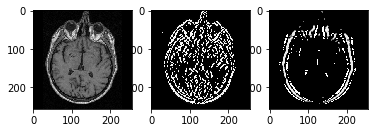

In [236]:
# z不知道怎么调参啊
fig, axes = plt.subplots(1, 3)
axes[0].imshow(brain_im,cmap='gray')
axes[1].imshow(contours2,cmap='gray')
axes[2].imshow(contours,cmap='gray')


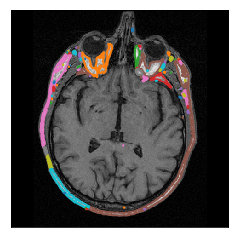

In [240]:
# 对比方法
from skimage import measure
# Find contours at a constant value of 0.8
contours3 = measure.find_contours(brain_im, 99.998)
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(brain_im, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours3):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
## compute the size
pixels = 0
a = 0
for i in range(len(contours[:,1])):
    if len(contours[i,:].nonzero()[0])>0:
        a = np.max(contours[i,:].nonzero())-np.min(contours[i,:].nonzero())
        pixels +=a

In [183]:
## compute the size
pixels = 0
a = 0
for i in range(len(contours[:,1])):
    if len(contours[i,:].nonzero()[0])>0:
        a = np.max(contours[i,:].nonzero())-np.min(contours[i,:].nonzero())
        pixels +=a

### 1.4 Additional method(s)
Add your implementation and discussion


In [154]:
def applySep1ndGFilter(I,sigma1,sigma2):  
    output = np.asarray([scipy.ndimage.filters.gaussian_filter1d(I[i,:],sigma1,order = 1)for i in range(I.shape[0])])
    output = np.asarray([scipy.ndimage.filters.gaussian_filter1d(output[:,j],sigma2,order=1) for j in range(I.shape[1])])
    output = output.transpose()
    return output

In [162]:
np.max(contours[5,:].nonzero())

149

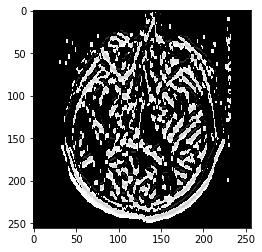

In [155]:
contours = applySep1ndGFilter(brain_im,2,2)
contours[(contours<40) ] = 0
plt.imshow(contours,'gray')

## Part 2: Shape/color segmentation

You will find hereafter a picture of shapes of different colors, taken under four different illuminations.
We ask you to create a routine to:
1. Count the number of shapes of each color.
1. Compute the total area (in pixels) of each color.

One specific challenge is to be robust to illumination changes.
Try to have the same routine(s) running on the four images, and giving (approximatively) the same results.
Therefore some kind of intensity normalization should probably be used.
To help you, you will also find a reference image (palette) with disks of each possible color, that you can use as references.

**Note:** the routine(s) that you will write for this part will be useful for the robot project as well, so pay special attention to it.

### 2.1 Images and palette visualization

In [3]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03', 'arena-shapes-04']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  4
Image size: 480, 640 
Number of color channels:  3


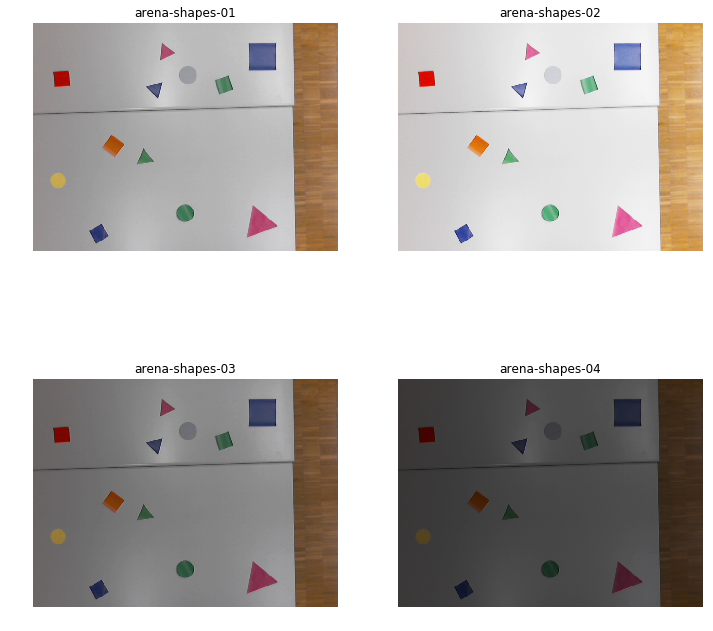

In [4]:
# Plot images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

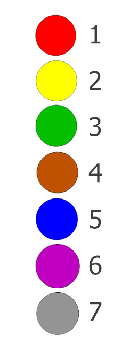

In [5]:
# Load and plot palette
palette = skimage.io.imread(os.path.join(data_path, 'arena-palette.png'))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(palette)
ax.axis('off')
plt.show()

### 2.2 Number of shapes of each color
Add your implementation and discussion

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion